In [1]:
from latex_figure import plotfigure
import numpy
import pandas
from scipy.stats import linregress

In [2]:
aspect_ratio = 4 / 5
FULLSIZE = 5, 5 * aspect_ratio
HALFSIZE = 3, 3 * aspect_ratio

In [3]:
filename = "Overall Linearity.pdf"

In [4]:
full_range = pandas.read_csv('long_span_run 20200226 overnight')

In [5]:
middle_range = pandas.read_csv('long_span_run 20200227 overnight.csv')

In [6]:
Q1 = 0

q_full = []
T_full = []

for index, row in full_range.iterrows():
#     print (index)
    if row['Q1'] != Q1:
        Q1 = row['Q1']
        
#         print (full_range.iloc[index-1])
        
        q_full.append(full_range.iloc[index-1]['Q1'])
        T_full.append(full_range.iloc[index-1]['T1'])
q_full.append(full_range.iloc[-1]['Q1'])
T_full.append(full_range.iloc[-1]['T1'])

In [7]:
Q1 = 50

q_middle = []
T_middle = []

for index, row in middle_range.iterrows():
#     print (index)
    if row['Q1'] != Q1:
        Q1 = row['Q1']
        
#         print (middle_range.iloc[index-1])
        
        q_middle.append(middle_range.iloc[index-1]['Q1'])
        T_middle.append(middle_range.iloc[index-1]['T1'])
# q_middle.append(middle_range.iloc[-1]['Q1'])
# T_middle.append(middle_range.iloc[-1]['T1'])

In [8]:
linreg_fit = linregress(q_full, T_full)
print(linreg_fit.rvalue**2, linreg_fit)

0.9979193487629677 LinregressResult(slope=0.6399181818181818, intercept=24.334090909090907, rvalue=0.998959132679094, pvalue=2.2133308190981842e-13, stderr=0.00973991390439387)


In [9]:
line_100 = linreg_fit.slope*100 + linreg_fit.intercept
line_0 = linreg_fit.slope*0 + linreg_fit.intercept

In [10]:
qs = [q_full,  [0, 100]] #q_middle,
Ts = [T_full,  [line_0, line_100]] #T_middle,

In [11]:
Linetypes = ['ro','b', 'b']

x_label = 'Q1 Value (%)'
y_label = 'T1 Steady State (\u00B0C)'

YNAMES = ['Full Range', 'Around 50', 'Linear']

filename = "Linearity Figure.pdf"

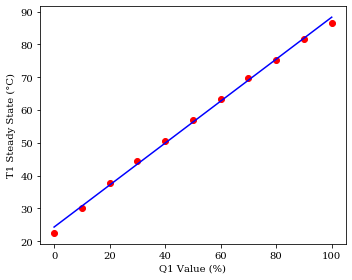

In [12]:
plotfigure(qs, Ts, YNAMES, Linetypes, x_label, y_label ,FULLSIZE, filename, diff=False, legend=False)

In [13]:
linreg_fit = linregress(q_middle, T_middle)

print(linreg_fit.rvalue**2, linreg_fit)

0.9879288230029681 LinregressResult(slope=0.6487371338083925, intercept=26.67526128266034, rvalue=0.9939460865675603, pvalue=8.358130966211244e-16, stderr=0.018515485702255446)


In [14]:
line_60 = linreg_fit.slope*60 + linreg_fit.intercept
line_40 = linreg_fit.slope*40 + linreg_fit.intercept

In [18]:
qs = [q_middle,  [40, 60]] #q_middle,
Ts = [T_middle,  [line_40, line_60]] #T_middle,

In [19]:
Linetypes = ['ro','b', 'b']

x_label = 'Q1 Value (%)'
y_label = 'T1 Steady State (\u00B0C)'

YNAMES = ['Full Range', 'Around 50', 'Linear']

filename = "Linearity Figure Middle.pdf"

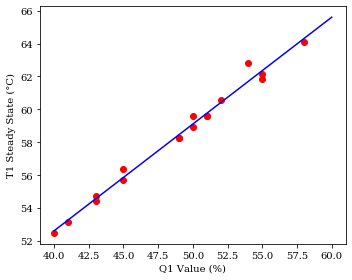

In [20]:
plotfigure(qs, Ts, YNAMES, Linetypes, x_label, y_label ,FULLSIZE, filename, diff=False, legend=False)